In [2]:
import numpy as np
import path as Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatwCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy.cosmology import wCDM
from astropy.cosmology import Flatw0waCDM
import scipy
from escape_functions_noastropy import *
from multiprocessing import Process
from multiprocessing import Queue
from multiprocessing import Pool
import emcee
import corner

In [9]:
cosmo = FlatwCDM(H0=70, Om0=0.2,w0=-1)
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1)
cosmo = FlatLambdaCDM(H0=70,Om0=0.2)
cosmo = LambdaCDM(H0=70, Om0=0.2, Ode0 = 0)
cosmo = Flatw0waCDM(H0=70, Om0=0.2, w0=-0.9, wa=0.2)

In [10]:
astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg

4.300917270069976e-09

In [11]:
z=0.2
M200 = 1e15*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print rho_crit
print rho_crit_z(z,[0.2,-0.9,0.2,0.7],'Flatw0waCDM')
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name='FlatLambdaCDM')
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
print R200crit

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(rho_crit)? (<ipython-input-11-6f704aa4e855>, line 5)

In [12]:
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]

In [13]:
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmology(cosmo)

[0.2, 0.8, -1.0, 0.7]

Mean fit (1e15) =  0.9982395285114913
M200 =  1e+15 solMass
R200 (sphere) =  1.97141172229 Mpc
Conc (Sereno) =  3.2041969809
n =  3.9924040270729604
sigma n =  0.035425850063980135
rho_0 =  3.513234669356727e+17
sigma_rho_0 =  5009458177993920.0
h =  0.00015851541579169618
sigma_h =  3.1703083158339235e-05


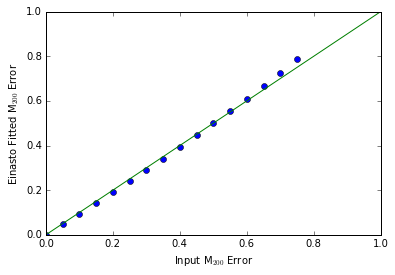

In [7]:
M200 = 1e15*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.2
for i in range(16):
    M200,R200,conc, rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_einasto = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0,h,n))[0]
    M200_einasto_p = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0+sigma_rho_0, h+corr_coef*sigma_h, n+sigma_n ))[0]
    M200_einasto_m = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0-sigma_rho_0, h-corr_coef*sigma_h, n-sigma_n ))[0]
    real_error =  np.append(real_error,((1-M200_einasto_m) + (M200_einasto_p-1))/(2*M200_einasto))
    real_mean =  np.append(real_mean,M200_einasto)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('Einasto Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15

M200,R200,conc,rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, 0.2, z,cosmo_params, cosmo.name)
print 'M200 = ', M200
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'n = ',n
print 'sigma n = ', sigma_n
print 'rho_0 = ',rho_0
print 'sigma_rho_0 = ', sigma_rho_0
print 'h = ', h
print 'sigma_h = ', corr_coef*h

Mean fit (1e15) =  0.5000000000000002
M200 =  5.0 solMass
R200 (sphere) =  1.56471052091 Mpc
Conc (Sereno) =  3.39629750846
rho_s/1e14 =  5.745170579479509
sigma rho_s/1e14 =  0.24892813462110125
r_s =  0.46071067596929743
sigma r_s =  0.03829814702511186


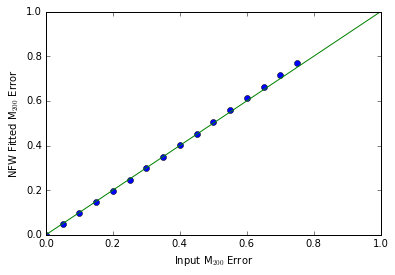

In [8]:
M200 = 5e14*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3)* u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.85
for i in range(16):
    M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_nfws = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s, r_s))[0]
    M200_nfws_p = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s+sigma_rho_s,r_s+corr_coef*sigma_r_s))[0]
    M200_nfws_m = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s-sigma_rho_s,r_s-corr_coef*sigma_r_s))[0]
    real_error =  np.append(real_error,((1-M200_nfws_m) + (M200_nfws_p-1))/(2*M200_nfws))
    real_mean =  np.append(real_mean,M200_nfws)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('NFW Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15
M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, 0.2, z,cosmo_params, cosmo.name)

print 'M200 = ', M200/1e14
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'rho_s/1e14 = ' , rho_s/1e14
print 'sigma rho_s/1e14 = ' , sigma_rho_s/1e14
print 'r_s = ',r_s
print 'sigma r_s = ', sigma_r_s

In [9]:
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
print G_newton, M200, cosmo_params, cosmo.name
print q_z_function(z, cosmo_params,cosmo.name)
print r_eq(0.2,M200,cosmo_params, cosmo.name)

4.30091727007e-09 5e+14 solMass [0.2, 0.8, -1.0, 0.7] wCDM
-0.547486033519553
8.87788784963 Mpc


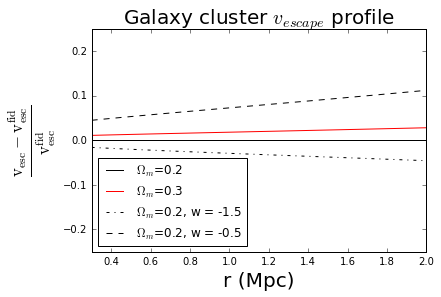

At z =  0.2


In [10]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) *u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
r,phi0 = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi0-phi0)/phi0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'r', label=r'$\Omega_m$=0.3')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0.3,2)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('r (Mpc)', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ profile',fontsize=20)
plt.show()
print 'At z = ', z

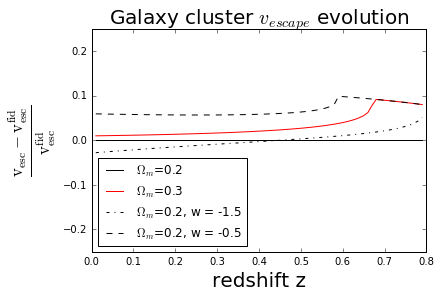

At r =  0.9010000000000001


In [11]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z= np.arange(0.01, 0.8, 0.01)
rrr = 1.5
vesc_z0 = []
radius_use = 35
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z0 = np.append(vesc_z0,vesc[radius_use])
plt.plot(z,(vesc_z0-vesc_z0)/vesc_z0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
vesc_z = []
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'r', label=r'$\Omega_m$=0.3')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0,0.8)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('redshift z', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ evolution',fontsize=20)
plt.show()
print 'At r = ',r[radius_use]


In [14]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
z = 0.2
M200_orig = 5e14*u.solMass
M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200_orig, 0.2, z,cosmo_params, cosmo.name)

<ErrorbarContainer object of 3 artists>

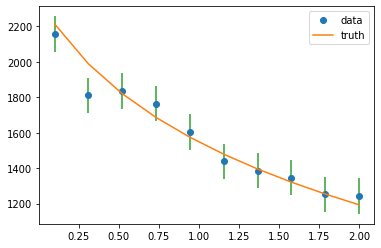

In [16]:
radial_bins = 10
error_kms = 100
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_data_array = radius_array /D_A(z, cosmo_params, cosmo.name).value
xdata = theta_data_array
#d_alpha = np.random.normal(alpha,sigma_alpha)
#d_r_2 = np.random.normal(r_2,sigma_r_2)
#d_rho_2 = np.random.normal(rho_2*1e14,sigma_rho_2)/1e14
r,ydata = v_esc_NFW_M200(theta_data_array,z,M200.value,100,cosmo_params, cosmo.name) + np.random.normal(0,error_kms,size=radial_bins) 
ydata_err = np.zeros(len(ydata)) + error_kms
# print xdata
# print ydata
# print ydata_err
r,truth = v_esc_NFW_M200(theta_data_array,z,M200.value,100,cosmo_params, cosmo.name)
plt.plot(r,ydata, 'o', linestyle='None',label = 'data')
plt.plot(r, truth, '-', label = 'truth')
plt.legend()
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None')

In [128]:
def lnprior(theta):
    p_M200 = theta
    if not(1e13 < p_M200 < 1e17 ):
          return -np.inf
    return 0.0

In [129]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = 0.2
    p_M200 = theta[0]
    p_N = 100
    p_Omega_M = 0.2
    p_little_h = 0.7
#    print p_theta_array,p_z,p_alpha,p_rho_2,p_r_2,p_Zv,p_Omega_M,p_little_h,p_w
    ymodel = v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,[p_Omega_M,p_little_h],'FlatLambdaCDM')
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [130]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [131]:
print xdata
print ydata
print ydata_err

[0.00014473 0.0004501  0.00075547 0.00106084 0.00136621 0.00167302
 0.00197839 0.00228376 0.00258913 0.0028945 ]
[2120.88810979 1858.73817503 1781.36400399 1751.71547196 1458.8065787
 1413.93695269 1548.64178068 1291.11598999 1289.94064123 1264.22340774]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [132]:
ndim, nwalkers, nsteps = 1, 50, 1000
p0 = np.transpose([np.random.uniform(1,10000,size=nwalkers)*1e13])#print np.shape(p0)

In [133]:
pool = Pool(processes=20)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:109: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:109: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:109: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
/u/home/christoq/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in power
  *arrays, **kwargs)
escape_functions_noastropy.py:109: RuntimeWarning: invalid value encountered in double_scalars
  r200 =   (3*M200/(4*np.pi*200*rho_crit))**(1/3.0)
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mas

State([[5.03694479e+14]
 [4.55569821e+14]
 [4.75438789e+14]
 [4.64804868e+14]
 [5.18380128e+14]
 [5.16761702e+14]
 [4.95148245e+14]
 [4.73351441e+14]
 [4.98787708e+14]
 [4.63384209e+14]
 [4.94304688e+14]
 [5.47256177e+14]
 [5.18610130e+14]
 [4.54393933e+14]
 [4.41097016e+14]
 [4.67753721e+14]
 [4.97528783e+14]
 [4.83765915e+14]
 [5.03706179e+14]
 [5.01448847e+14]
 [5.06142054e+14]
 [4.87087649e+14]
 [4.79113638e+14]
 [5.15439417e+14]
 [4.87578931e+14]
 [4.79814366e+14]
 [4.66933253e+14]
 [4.79830243e+14]
 [5.03305753e+14]
 [4.84265876e+14]
 [4.73153773e+14]
 [4.93613982e+14]
 [4.84733049e+14]
 [4.87856619e+14]
 [4.92870008e+14]
 [4.83733849e+14]
 [4.71299262e+14]
 [4.45841537e+14]
 [4.85582364e+14]
 [5.31736699e+14]
 [5.05824690e+14]
 [4.93581351e+14]
 [5.18121731e+14]
 [4.99672104e+14]
 [4.89395871e+14]
 [4.71092726e+14]
 [4.97862366e+14]
 [4.81729751e+14]
 [4.75716026e+14]
 [5.21391825e+14]], log_prob=[-1285.06691936 -1285.71604537 -1284.89270502 -1285.23119354
 -1285.73296985 -1285.

(50, 1000, 1)


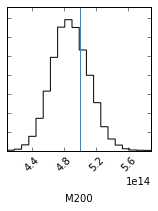

67
median(M200) =  487189837760855.75 +/- 23202657235174.188 21672589871700.5
median(logM200) =  14.687698220818552 +/- 0.02020605891145344 0.01976244414927919
Truth:  14.698970004336019


In [134]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 1))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["M200"], truths = [M200.value])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
M200_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
M200_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
M200_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
M200_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(M200) = ', M200_fit_50, '+/-', M200_fit_67-M200_fit_50, M200_fit_50-M200_fit_33
print 'median(logM200) = ', np.log10(M200_fit_50), '+/-', np.log10(M200_fit_67)-np.log10(M200_fit_50), np.log10(M200_fit_50) -np.log10(M200_fit_33)
sigma_M200_fit = (M200_fit_67-M200_fit_50 + M200_fit_50-M200_fit_33)/2.0
print 'Truth: ', np.log10(M200.value)

In [3]:
def lnprior(theta):
    p_rho_s = theta[0]
    p_r_s = theta[1]
    p_M200 = theta[2]
    if not((1e13 < p_rho_s < 1e17) & (0.2 < p_r_s < 1) & (p_M200 == 5e14)):
          return -np.inf
    return 0.0


In [4]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = 0.2
    p_M200 = theta[2]
    p_rho_s = theta[0]
    p_r_s = theta[1]
    p_N = 100
    p_Omega_M = 0.2
    p_little_h = 0.7
#    print p_theta_array,p_z,p_alpha,p_rho_2,p_r_2,p_Zv,p_Omega_M,p_little_h,p_w
    ymodel = v_esc_NFWs(p_theta_array,p_z,p_M200, p_rho_s, p_r_s,p_N,[p_Omega_M,p_little_h],'FlatLambdaCDM')
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [5]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [7]:
print (xdata)
print (ydata)
print (ydata_err)

NameError: name 'xdata' is not defined

In [184]:
ndim, nwalkers, nsteps = 3, 100, 2000
p0 = np.transpose([np.random.uniform(1,10000,size=nwalkers)*1e13, np.random.uniform(0.2,1,size=nwalkers),np.random.uniform(1,1,size=nwalkers)*M200.value])#print np.shape(p0)

In [185]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4*np.pi*G_newton*rho_s*(r_s**2.0)*np.log(1+r/r_s)/(r/r_s)
escape_functions_noastropy.py:42: RuntimeWarning: invalid value encountered in log
  return -4

State([[7.66407947e+14 3.99526028e-01 5.00000000e+14]
 [2.77273864e+13 3.93141635e-01 5.00000000e+14]
 [5.07626388e+14 4.81365282e-01 5.00000000e+14]
 [1.11306622e+14 2.15268876e-01 5.00000000e+14]
 [6.01683191e+13 2.57208743e-01 5.00000000e+14]
 [1.26808762e+13 6.62872979e-01 5.00000000e+14]
 [2.38780005e+13 4.02707419e-01 5.00000000e+14]
 [1.59913773e+14 8.36999198e-01 5.00000000e+14]
 [2.24342745e+14 2.30789571e-01 5.00000000e+14]
 [1.76003703e+14 2.15351263e-01 5.00000000e+14]
 [1.65094592e+14 2.20687960e-01 5.00000000e+14]
 [1.14799010e+14 9.70021489e-01 5.00000000e+14]
 [3.01197486e+14 6.06611948e-01 5.00000000e+14]
 [2.60926608e+14 6.41431810e-01 5.00000000e+14]
 [1.16376960e+14 2.01233493e-01 5.00000000e+14]
 [1.24267926e+14 2.14928016e-01 5.00000000e+14]
 [1.04394410e+13 6.05668112e-01 5.00000000e+14]
 [7.10871515e+13 2.00659205e-01 5.00000000e+14]
 [1.87775058e+13 6.17802220e-01 5.00000000e+14]
 [7.41946263e+14 4.05005321e-01 5.00000000e+14]
 [2.23022024e+14 2.12010876e-01 5.

(100, 2000, 3)


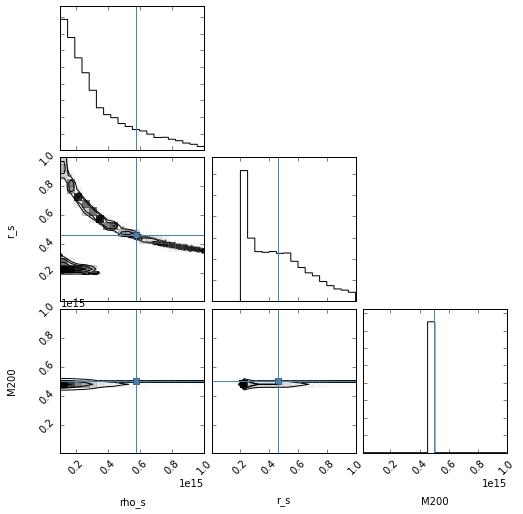

67
median(rho_s) =  160298273046132.38 +/- 308526721936487.06 133061207057816.66
median(log rho_s) =  14.204928843560786 +/- 0.4660819140858834 0.7697685205591149
Truth:  14.759302927824459
median(r_s) =  0.4255552645840209 +/- 0.25734067095171304 0.18965748226536325
Truth:  0.46071067596929743


In [201]:
burn = 500
samples = sampler.chain[:, burn:, :].reshape((-1, 3))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_s", "r_s", "M200"], truths = [rho_s, r_s, M200.value], range=[(1e14,1e15), (0.0,1.0), (1e13,1e15)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
rho_s_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_s_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_s_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_s_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
r_s_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
r_s_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
r_s_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
r_s_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
print 'median(rho_s) = ', rho_s_fit_50, '+/-', rho_s_fit_67-rho_s_fit_50, rho_s_fit_50-rho_s_fit_33
print 'median(log rho_s) = ', np.log10(rho_s_fit_50), '+/-', np.log10(rho_s_fit_67)-np.log10(rho_s_fit_50), np.log10(rho_s_fit_50) -np.log10(rho_s_fit_33)
sigma_rho_s_fit = (rho_s_fit_67-rho_s_fit_50 + rho_s_fit_50-rho_s_fit_33)/2.0
print 'Truth: ', np.log10(rho_s)
print 'median(r_s) = ', r_s_fit_50, '+/-', r_s_fit_67-r_s_fit_50, r_s_fit_50-r_s_fit_33
sigma_rho_s_fit = (r_s_fit_67-r_s_fit_50 + r_s_fit_50-r_s_fit_33)/2.0
print 'Truth: ',r_s

In [191]:
burn = 100
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
rho_s_fitted = sampler.chain[:,burn:,0].flatten()
r_s_fitted = sampler.chain[:,burn:,1].flatten()
rand_vec = np.random.uniform(1,len(r_s_fitted),size=10000).astype(int)
r = np.linspace(0.01,2.0,1000).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
M200_fitted = []
for i in range(10000):
    M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s_fitted[rand_vec[i]],r_s_fitted[rand_vec[i]]))[0])


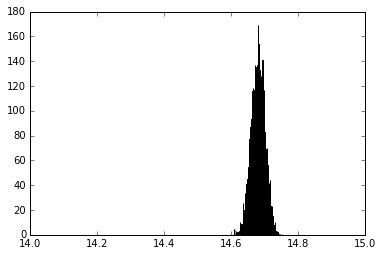

median(M200_fitted) =  478323093354610.4 +/- 12694833108779.375 12805845465455.125
median(logM200_fitted) =  14.67972134903915 +/- 0.019148470132316575 0.02026055918682701
Truth:  14.698970004336019


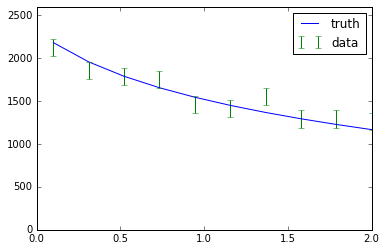

In [218]:
#We Choose to ignore bad fits in the posterior....in this case, those returning masses a factor of 10 below expectations. This happens due to degeneracies in 
#rho_s versus r_s, which are controlled when we usa an M - c relation. We note the secondary peak in the posterior produce BAD fits as evidenced through
#a posterior predictive check.
w = np.where(M200_fitted > 5e13)[0]
plt.hist(np.log10(M200_fitted[w]),bins=100)
plt.xlim(14,15)
plt.show()
M200_fitted_50 =  np.percentile(M200_fitted[w],50)
M200_fitted_33 =  np.percentile(M200_fitted[w],33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted[w],67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fit_50, M200_fitted_50-M200_fit_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'Truth: ', np.log10(M200.value)

rho_s_fitted_50 = np.percentile(rho_s_fitted[w],50)
r_s_fitted_50 = np.percentile(r_s_fitted[w],50)
r,truth = v_esc_NFW_M200(theta_data_array,z,M200_fitted_50,100,cosmo_params, cosmo.name)
plt.plot(r, truth, '-', label = 'truth')
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None', label = 'data')
plt.ylim(0,2600)
plt.legend()

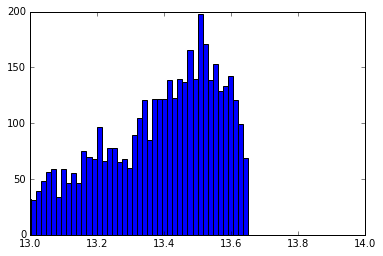

median(M200_bad_fitted) =  23826745803547.758 +/- -451975355899522.75 -441690502085607.5
median(logM200_bad_fitted) =  13.37706473155884 +/- 0.16965657109654764 0.3517263760776821
Truth:  14.698970004336019 0.26069147358711486


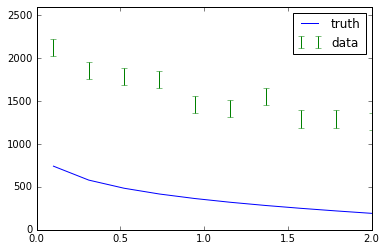

In [219]:
#We Choose to ignore bad fits in the posterior....in this case, those returning masses a factor of 10 below expectations. This happens due to degeneracies in 
#rho_s versus r_s, which are controlled when we usa an M - c relation. We note the secondary peak in the posterior produce BAD fits as evidenced through
#a posterior predictive check.
w = np.where(M200_fitted < 5e13)[0]
plt.hist(np.log10(M200_fitted[w]),bins=100)
plt.xlim(13,14)
plt.show()

rho_s_bad_fitted_50 = np.percentile(rho_s_fitted[w],50)
r_s_bad_fitted_50 = np.percentile(r_s_fitted[w],50)
M200_bad_fitted_50 =  np.percentile(M200_fitted[w],50)
M200_bad_fitted_33 =  np.percentile(M200_fitted[w],33-16.5)
M200_bad_fitted_67 =  np.percentile(M200_fitted[w],67+16.5)
print 'median(M200_bad_fitted) = ', M200_bad_fitted_50, '+/-', M200_bad_fitted_67-M200_fit_50, M200_bad_fitted_50-M200_fit_33
print 'median(logM200_bad_fitted) = ', np.log10(M200_bad_fitted_50), '+/-', np.log10(M200_bad_fitted_67)-np.log10(M200_bad_fitted_50), np.log10(M200_bad_fitted_50) -np.log10(M200_bad_fitted_33)
sigma_logM200_bad_fitted = (np.log10(M200_bad_fitted_67)-np.log10(M200_bad_fitted_50) + np.log10(M200_bad_fitted_50)-np.log10(M200_bad_fitted_33))/2.0
print 'Truth: ', np.log10(M200.value), sigma_logM200_bad_fitted

r,truth = v_esc_NFW_M200(theta_data_array,z,M200_bad_fitted_50,100,cosmo_params, cosmo.name)
plt.plot(r, truth, '-', label = 'truth')
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None', label = 'data')
plt.ylim(0,2600)
plt.legend()

In [452]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
z = 0.1
M200_orig = 5e14*u.solMass
M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200_orig, 0.2, z,cosmo_params, cosmo.name)

[0.00026089 0.00081138 0.00136187 0.00191236 0.00246284 0.00301594
 0.00356643 0.00411691 0.0046674  0.00521789]
[2144.17024673 1958.62974149 1779.91774883 1652.08434615 1570.2331878
 1416.79439983 1418.74018004 1236.36258489 1215.13502062 1171.27669667]
[50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]


<Container object of 3 artists>

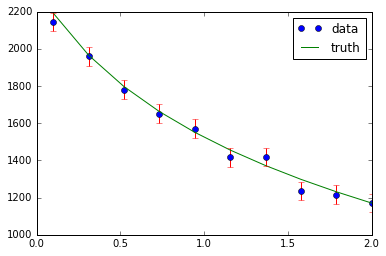

In [453]:
radial_bins = 10
error_kms = 50
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_data_array = radius_array /D_A(z, cosmo_params, cosmo.name).value
xdata = theta_data_array
#d_alpha = np.random.normal(alpha,sigma_alpha)
#d_r_2 = np.random.normal(r_2,sigma_r_2)
#d_rho_2 = np.random.normal(rho_2*1e14,sigma_rho_2)/1e14
r,ydata = v_esc_NFW_M200(theta_data_array,z,M200.value,100,cosmo_params, cosmo.name) + np.random.normal(0,error_kms,size=radial_bins) 
ydata_err = np.zeros(len(ydata)) + error_kms
print xdata
print ydata
print ydata_err
r,truth = v_esc_NFW_M200(theta_data_array,z,M200.value,100,cosmo_params, cosmo.name)
plt.plot(r,ydata, 'o', linestyle='None',label = 'data')
plt.plot(r, truth, '-', label = 'truth')
plt.legend()
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None')

In [454]:
def lnprior(theta):
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    if not(0.05 < p_Omega_M < 0.5 and 0.5 < p_little_h < 1.0):
          return -np.inf
    return 0.0

In [455]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = theta[3]
    p_M200 = theta[2]
    p_N = 100
    p_Omega_M = theta[0]
    p_little_h = theta[1]
    cosmo_params = [p_Omega_M,p_little_h]
    cosmo_name = 'FlatLambdaCDM'
    ymodel_fixed = lambda p_theta_array,p_N,cosmo_params,cosmo_name:v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,cosmo_params,'FlatLambdaCDM')
#    print p_theta_array,p_z,p_alpha,p_rho_2,p_r_2,p_Zv,p_Omega_M,p_little_h,p_w
#    ymodel = v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,[p_Omega_M,p_little_h],'FlatLambdaCDM')
    ymodel = ymodel_fixed(p_theta_array,p_N,cosmo_params,cosmo_name)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [456]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr)

In [457]:
ndim, nwalkers, nsteps = 4, 1000, 500
start_pos = [cosmo.Om0, cosmo.h]
p0 = np.transpose([np.random.uniform(0.05,0.95,size=nwalkers), np.random.uniform(0.05,0.95,size=nwalkers),np.repeat(5e14,nwalkers), np.repeat(0.1,nwalkers)])

In [458]:
pool = Pool(processes=35)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C
escape_functions_noastropy.py:280: RuntimeWarning: invalid value encountered in double_scalars
  c200 = A * (mass/Mpivot)**B * (1+redshift)**C

State([[7.70815625e-02 7.12502198e-01 5.00000000e+14 1.00000000e-01]
 [7.94731392e-02 1.80772271e-01 5.00000000e+14 1.00000000e-01]
 [2.63230102e-01 8.46382433e-02 5.00000000e+14 1.00000000e-01]
 ...
 [1.50982601e-01 6.80301230e-01 5.00000000e+14 1.00000000e-01]
 [3.35982594e-01 6.78491939e-01 5.00000000e+14 1.00000000e-01]
 [4.48291339e-01 5.69336577e-01 5.00000000e+14 1.00000000e-01]], log_prob=[-5035.24947735           -inf           -inf -5035.01379757
 -5036.04361602 -5035.78024969 -5034.4810518            -inf
 -5036.35210907 -5036.06543428           -inf           -inf
           -inf -5035.03415736 -5034.36603458 -5034.78898407
 -5036.00143542 -5034.44395292           -inf           -inf
 -5034.52630443 -5035.36367591 -5034.35787424 -5035.17427154
 -5034.55016267           -inf           -inf -5035.16358601
           -inf           -inf -5035.63489444 -5037.49374406
 -5035.0053852            -inf           -inf -5036.00213128
 -5034.32465699 -5035.7789649  -5034.35687874 -5034

(1000, 500, 4)


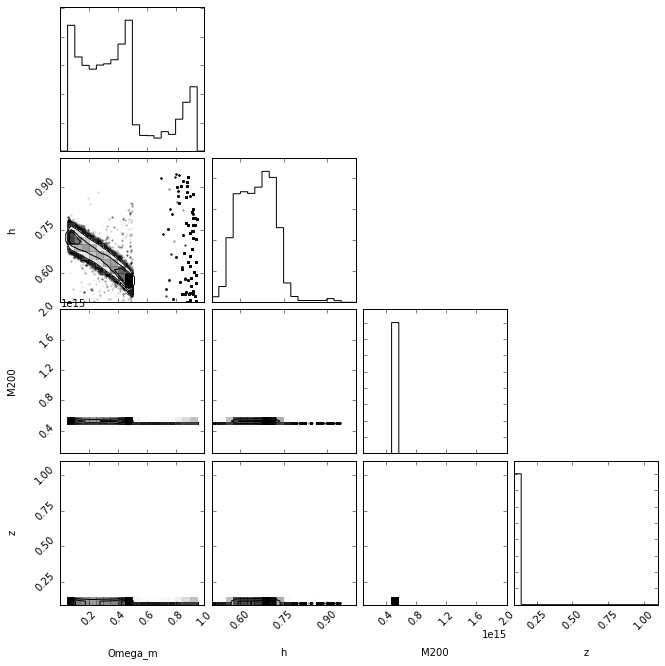

67
median(Omega_M) =  0.3692901278394385 +/- 0.26738743666361486 0.23098706210246478
median(h) =  0.6148208087469718 +/- 0.0918633568047359 0.4113440197020563
Truth:  0.2 0.7


In [459]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 4))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["Omega_m", "h","M200", "z"], range=[(0,1), (0.5,1.0), (1e14,2e15), (0.09,1.1)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
Omega_M_fit =  np.percentile(sampler.chain[:,:,0],percentile_array)
h_fit =  np.percentile(sampler.chain[:,:,1],percentile_array)
Omega_M_fit_50 =  np.percentile(sampler.chain[:,:,0],50)
h_fit_50 = np.percentile(sampler.chain[:,:,1],50)
Omega_M_fit_33 =  np.percentile(sampler.chain[:,:,0],33-16.5)
h_fit_33 = np.percentile(sampler.chain[:,:,1],33-16.5)
Omega_M_fit_67 =  np.percentile(sampler.chain[:,:,0],67+13.5)
h_fit_67 = np.percentile(sampler.chain[:,:,1],67+16.5)
print 'median(Omega_M) = ', Omega_M_fit_50, '+/-', Omega_M_fit_67-Omega_M_fit_50, Omega_M_fit_50-Omega_M_fit_33
print 'median(h) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
print 'Truth: ', cosmo.Om0, cosmo.h

In [460]:
burn = 200
print np.shape(sampler.chain)
Omega_m_fitted = sampler.chain[:,burn:,0].flatten()
h_fitted = sampler.chain[:,burn:,1].flatten()
rand_vec = np.random.uniform(1,len(Omega_m_fitted),size=5000).astype(int)
r = np.linspace(0.01,2.0,1000).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
Om0h_fitted = []
for i in range(5000):
    Om0h_fitted = np.append(Om0h_fitted, Omega_m_fitted[rand_vec[i]]*h_fitted[rand_vec[i]]/1.8)
print Om0h_fitted

(1000, 500, 4)
[0.00398549 0.14375413 0.1469422  ... 0.12965512 0.07542586 0.15467285]


0.14


(0.0, 0.5)

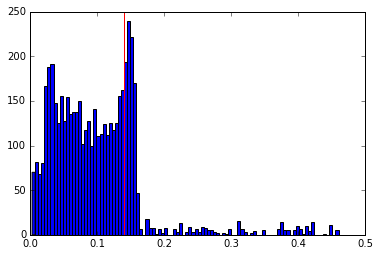

In [461]:
print cosmo.Om0*(cosmo.h**1.0)
plt.hist(Om0h_fitted,bins=100)
plt.axvline(0.14,color='r')
plt.xlim(0.0,0.5)

<Container object of 3 artists>

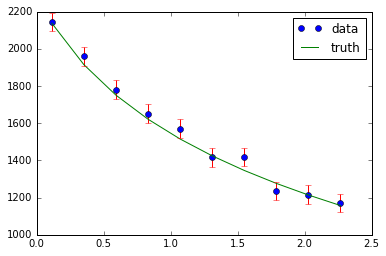

In [463]:
r,truth = v_esc_NFW_M200(theta_data_array,z,M200.value,100,[0.36,0.61], cosmo.name)
plt.plot(r,ydata, 'o', linestyle='None',label = 'data')
plt.plot(r, truth, '-', label = 'truth')
plt.legend()
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None')